In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
a = np.array([23,21,19,24,35,17,18,24,33,27,21,23])
b = np.array([31,28,19,24,32,27,16,41,23,32,29,33])

In [3]:
a.mean()

23.75

In [4]:
b.mean()

27.916666666666668

In [6]:
d = b.mean() - a.mean()
d

4.166666666666668

In [7]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
np.append(np.zeros(len(b)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [40]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a,b)
])

In [41]:
sales

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [23., 21., 19., 24., 35., 17., 18., 24., 33., 27., 21., 23., 31.,
        28., 19., 24., 32., 27., 16., 41., 23., 32., 29., 33.]])

In [42]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [43]:
np.random.shuffle(sales_t)

In [44]:
sales_t

array([[ 0., 21.],
       [ 1., 29.],
       [ 0., 17.],
       [ 1., 19.],
       [ 1., 16.],
       [ 1., 32.],
       [ 0., 19.],
       [ 0., 23.],
       [ 0., 35.],
       [ 1., 33.],
       [ 0., 33.],
       [ 0., 21.],
       [ 1., 27.],
       [ 0., 27.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 41.],
       [ 0., 23.],
       [ 1., 23.],
       [ 0., 24.],
       [ 1., 24.],
       [ 0., 24.],
       [ 0., 18.],
       [ 1., 32.]])

In [45]:
experiment_label = np.random.randint(0,2,len(sales_t))
experiment_label

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [46]:
experiment_data = np.array([
    experiment_label,
    sales_t[:,1]
])
experiment_data

array([[ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [21., 29., 17., 19., 16., 32., 19., 23., 35., 33., 33., 21., 27.,
        27., 31., 28., 41., 23., 23., 24., 24., 24., 18., 32.]])

In [47]:
experiment_data_t =  experiment_data.T
experiment_data_t

array([[ 1., 21.],
       [ 1., 29.],
       [ 0., 17.],
       [ 1., 19.],
       [ 0., 16.],
       [ 0., 32.],
       [ 0., 19.],
       [ 1., 23.],
       [ 0., 35.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 21.],
       [ 1., 27.],
       [ 0., 27.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 23.],
       [ 1., 24.],
       [ 0., 24.],
       [ 1., 24.],
       [ 1., 18.],
       [ 1., 32.]])

In [48]:
experiment_data_t[experiment_data_t[:,0] == 1][:,1].mean()

25.928571428571427

In [49]:
experiment_data_t[experiment_data_t[:,0] == 0][:,1].mean()

25.7

In [60]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:,0] == 1][:,1].mean() - experiment_data[experiment_data[:,0] == 0][:,1].mean()
    return experiment_diff_mean


In [61]:
e1 = sh_exp(1000)

In [62]:
print(e1)

[[ 2.11428571]
 [ 4.25      ]
 [-3.32867133]
 [-4.17142857]
 [ 1.53846154]
 [ 2.99300699]
 [ 2.04444444]
 [ 3.83333333]
 [-3.46218487]
 [-2.32167832]
 [ 1.        ]
 [ 2.68571429]
 [-1.51111111]
 [ 1.15555556]
 [-1.75      ]
 [-3.11111111]
 [-1.81818182]
 [ 1.6       ]
 [ 1.82857143]
 [ 0.30769231]
 [-3.32867133]
 [ 0.44444444]
 [-1.37062937]
 [ 0.625     ]
 [-4.        ]
 [ 2.75      ]
 [-2.54545455]
 [ 3.        ]
 [ 1.70629371]
 [-0.57142857]
 [ 1.65034965]
 [ 0.1958042 ]
 [-1.33333333]
 [ 1.        ]
 [ 5.02857143]
 [ 0.83333333]
 [ 2.71328671]
 [ 6.31111111]
 [ 0.6875    ]
 [ 0.22857143]
 [ 0.74285714]
 [-3.46666667]
 [ 3.02857143]
 [-4.72727273]
 [-2.34285714]
 [-2.        ]
 [-0.44444444]
 [ 1.66666667]
 [ 4.        ]
 [ 1.2027972 ]
 [ 2.62857143]
 [ 2.54545455]
 [ 1.66666667]
 [ 2.04195804]
 [ 1.        ]
 [ 2.15384615]
 [ 1.87412587]
 [-1.82857143]
 [ 0.03361345]
 [-4.        ]
 [-0.45714286]
 [ 0.13986014]
 [ 2.5       ]
 [ 3.38461538]
 [ 2.        ]
 [ 0.62857143]
 [-0.66666

In [63]:
len(e1[e1 >= d])

50

In [64]:
50 / 1000 * 100 # P value

5.0

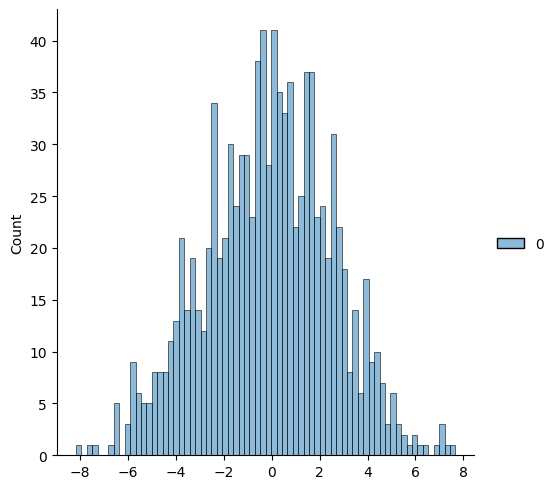

In [70]:
sns.displot(e1, bins=70)